In [1]:
!pip install ydata-profiling
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 65.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
from ydata_profiling import ProfileReport
from feature_engine.outliers import Winsorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("/kaggle/input/dataset-for-prediction/Prediction_datasetcsv.csv")

In [4]:
data.head()

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,4.0,4.0,4.0,4.0,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,5.0,4.0,4.0,4.0,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,1.0,4.0,4.0,4.0,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,0.0,4.0,4.0,4.0,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,3.0,4.0,4.0,4.0,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


In [5]:
print(data.columns)

Index(['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence', 'Role'],
      dtype='object')


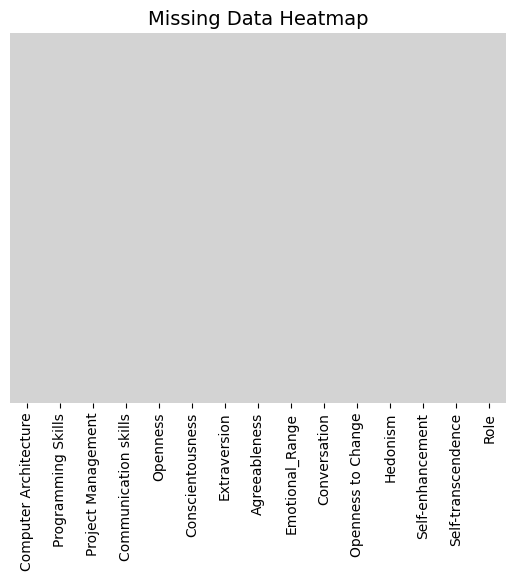

In [6]:
# Ensure the plot appears inline in Jupyter/Colab
%matplotlib inline

# Plot the heatmap with a subtle colormap
sns.heatmap(data.isnull(), cmap="crest", cbar=False, yticklabels=False, linewidths=0.5, linecolor='lightgray')

# Add a title for clarity
plt.title("Missing Data Heatmap", fontsize=14)

# Show the plot
plt.show()

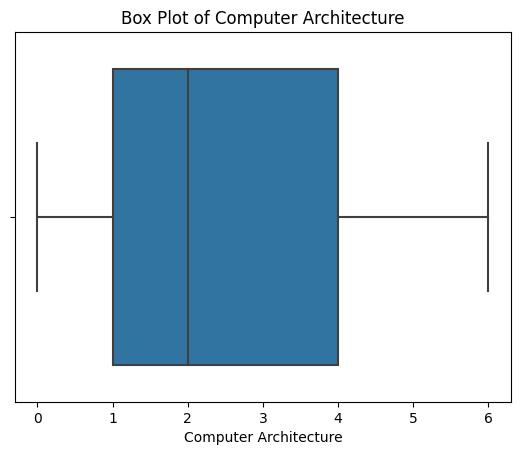

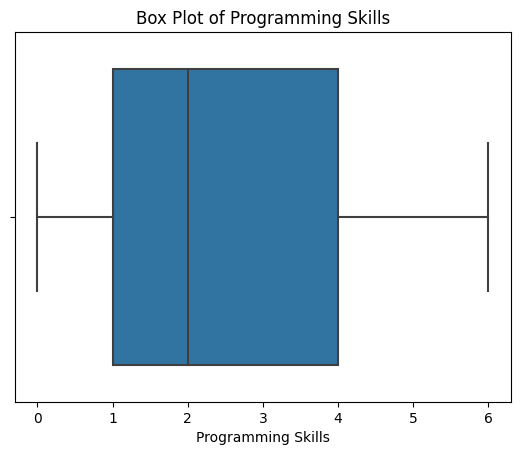

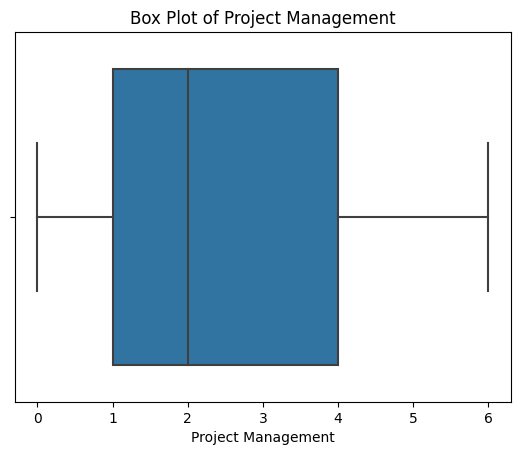

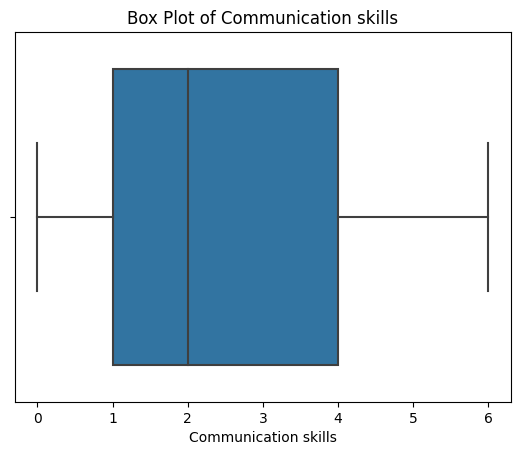

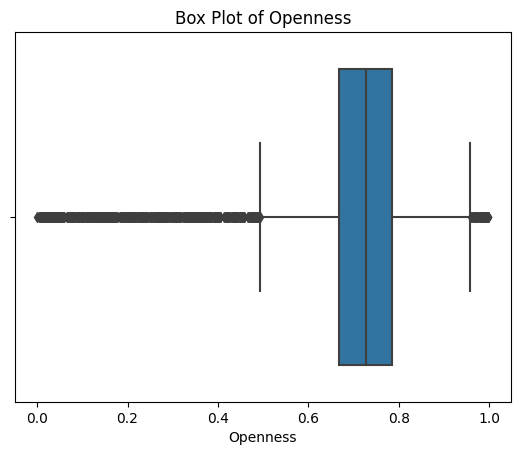

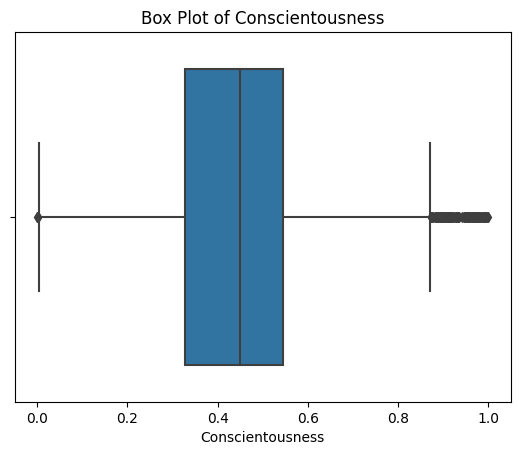

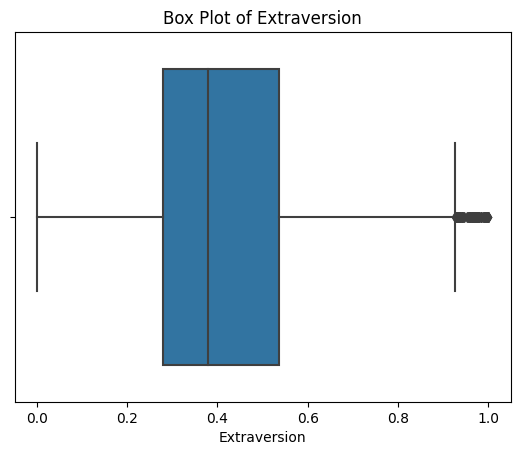

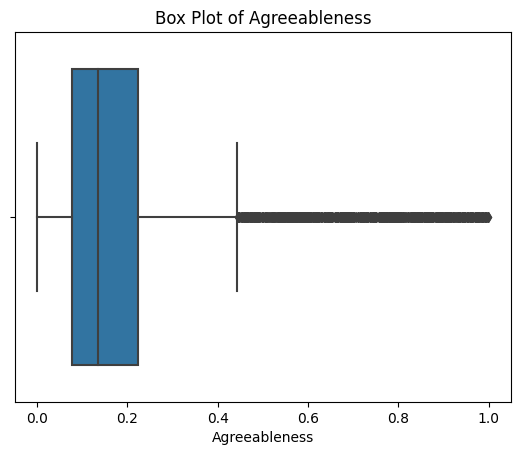

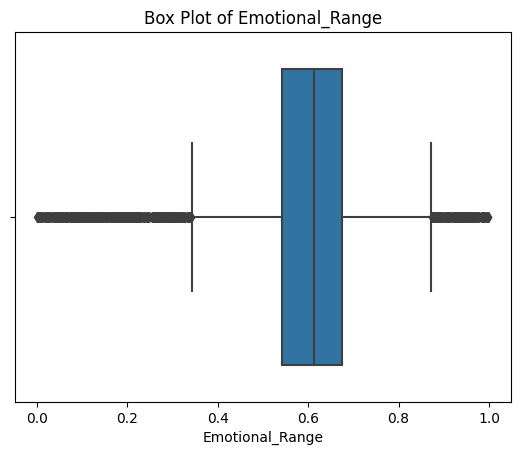

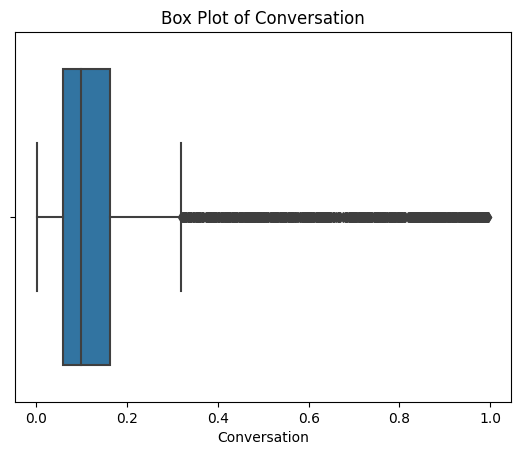

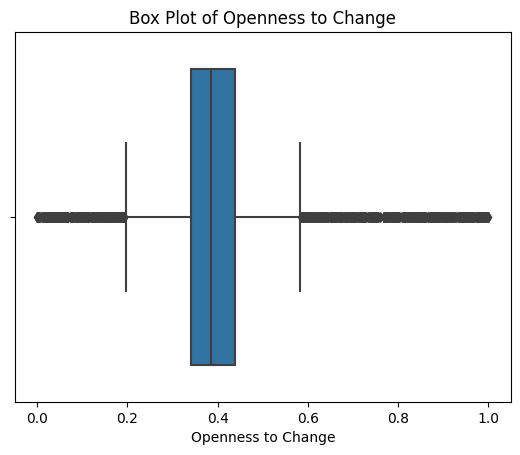

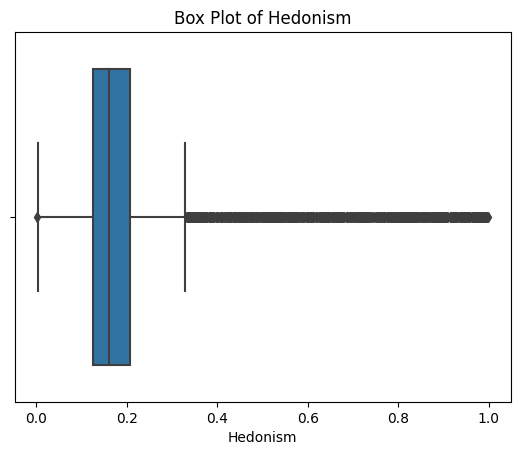

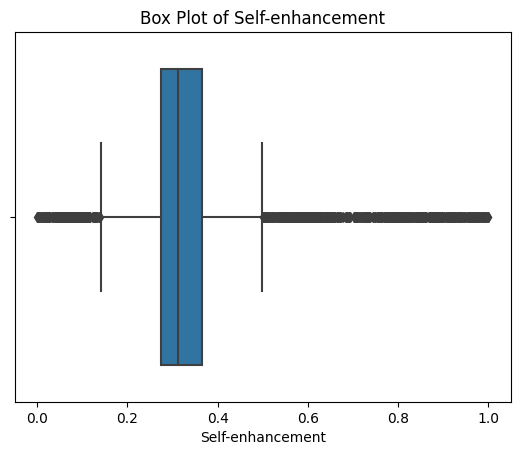

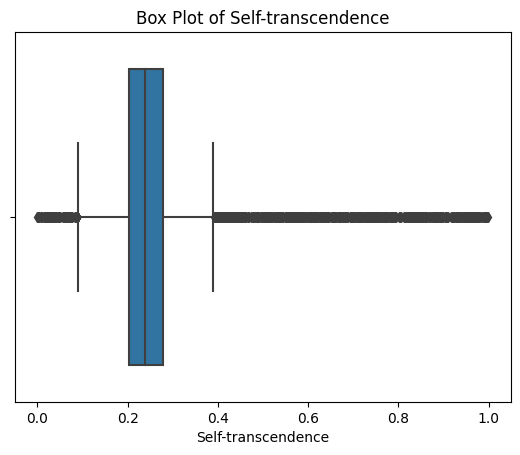

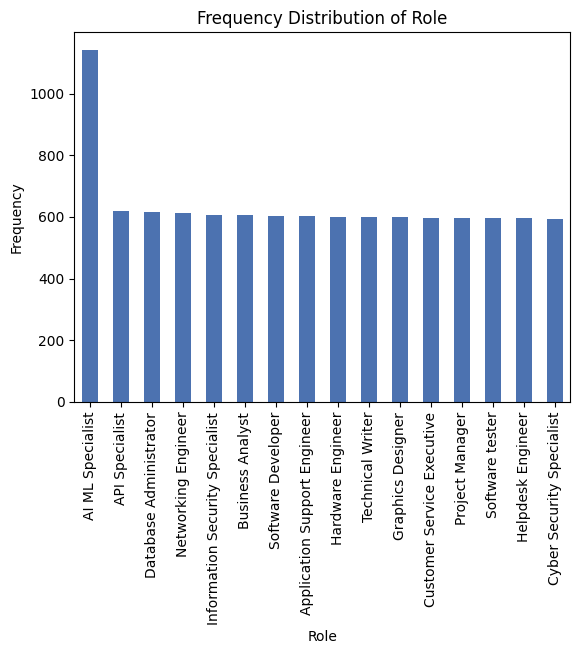

In [7]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

# 2. Check outliers for numerical columns using box plots
for col in numerical_cols:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()  # Display the plot explicitly in Google Colab

# 3. Check outliers for categorical columns using frequency analysis
for col in categorical_cols:
    plt.figure()  # Create a new figure for each frequency plot
    data[col].value_counts().plot(kind='bar', color='#4C72B0')
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()  # Display the plot explicitly in Google Colab

Processing column: Computer Architecture
Left cap: {'Computer Architecture': -3.5}
Right cap: {'Computer Architecture': 8.5}


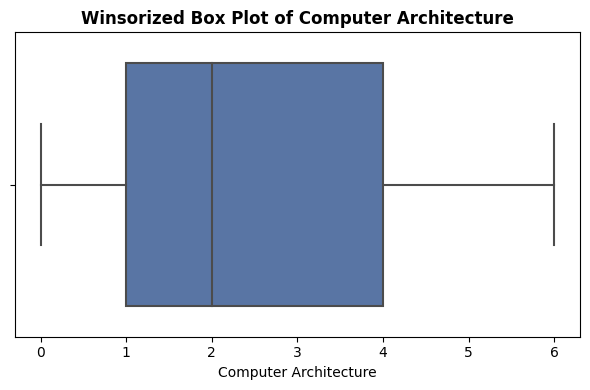

Processing column: Programming Skills
Left cap: {'Programming Skills': -3.5}
Right cap: {'Programming Skills': 8.5}


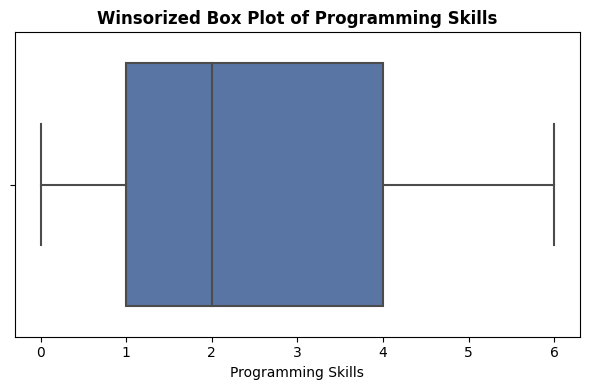

Processing column: Project Management
Left cap: {'Project Management': -3.5}
Right cap: {'Project Management': 8.5}


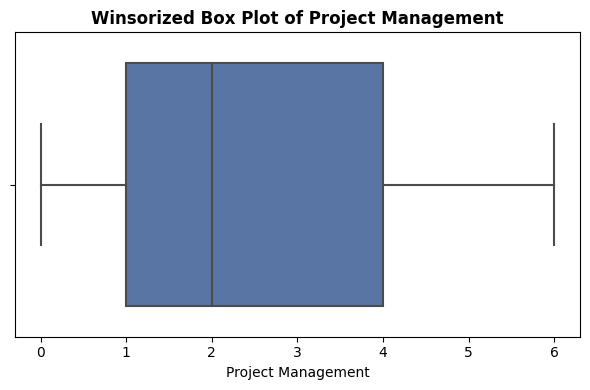

Processing column: Communication skills
Left cap: {'Communication skills': -3.5}
Right cap: {'Communication skills': 8.5}


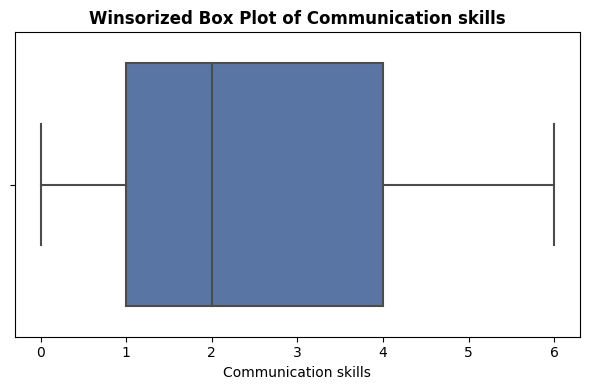

Processing column: Openness
Left cap: {'Openness': 0.4924507155000001}
Right cap: {'Openness': 0.9590775755}


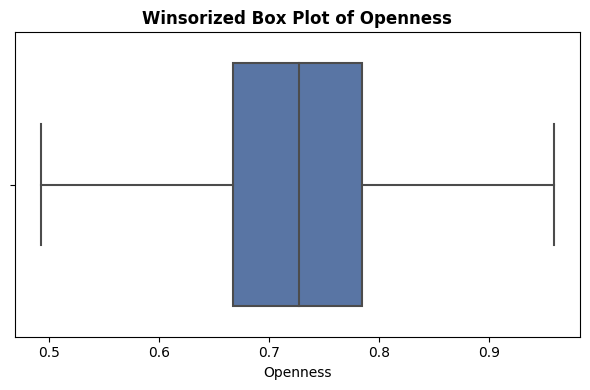

Processing column: Conscientousness
Left cap: {'Conscientousness': 0.0026680954999999673}
Right cap: {'Conscientousness': 0.8718174675000001}


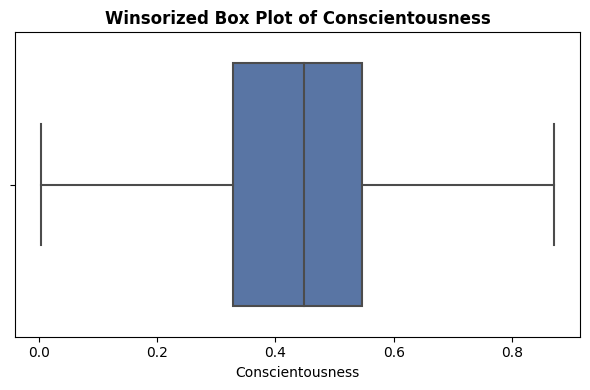

Processing column: Extraversion
Left cap: {'Extraversion': -0.11019554450000013}
Right cap: {'Extraversion': 0.9254707595000001}


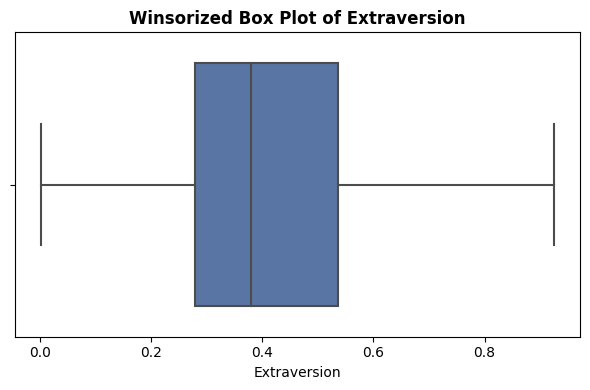

Processing column: Agreeableness
Left cap: {'Agreeableness': -0.14298967450000002}
Right cap: {'Agreeableness': 0.44412367350000004}


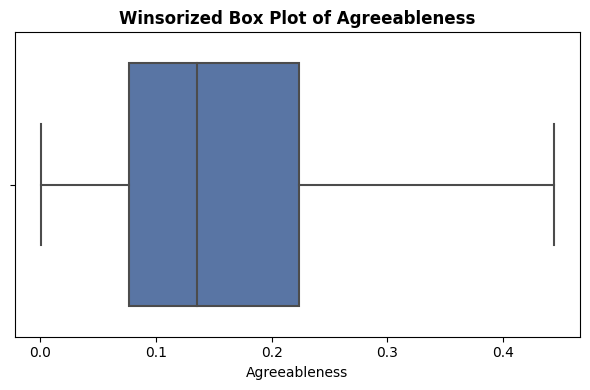

Processing column: Emotional_Range
Left cap: {'Emotional_Range': 0.3415101965000001}
Right cap: {'Emotional_Range': 0.8736609124999999}


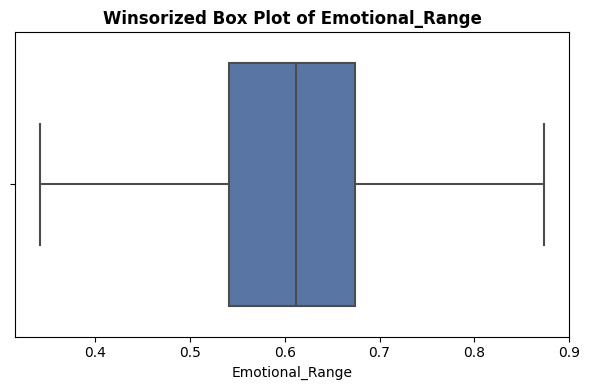

Processing column: Conversation
Left cap: {'Conversation': -0.09635065300000001}
Right cap: {'Conversation': 0.31810871500000004}


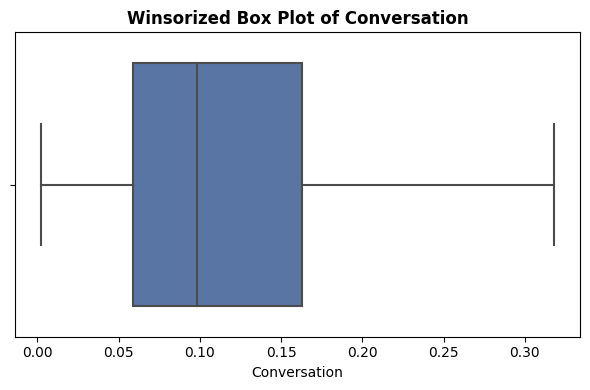

Processing column: Openness to Change
Left cap: {'Openness to Change': 0.19494570300000005}
Right cap: {'Openness to Change': 0.5845424709999999}


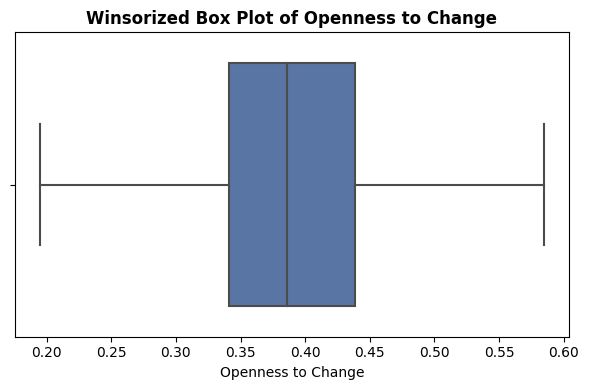

Processing column: Hedonism
Left cap: {'Hedonism': 0.002822728999999982}
Right cap: {'Hedonism': 0.330453857}


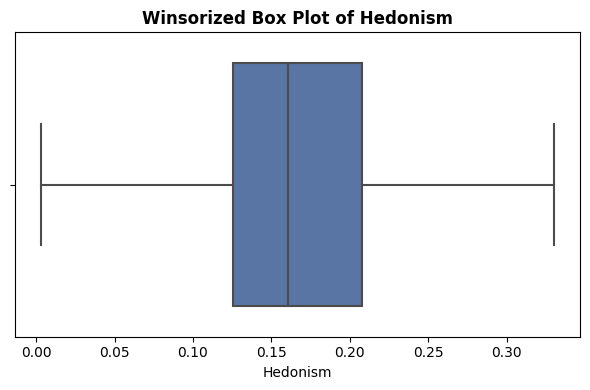

Processing column: Self-enhancement
Left cap: {'Self-enhancement': 0.13882158}
Right cap: {'Self-enhancement': 0.499482356}


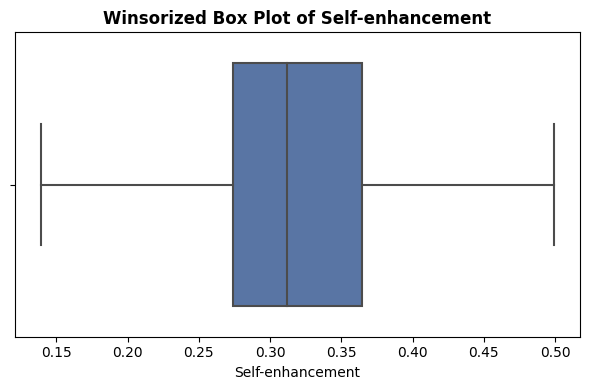

Processing column: Self-transcendence
Left cap: {'Self-transcendence': 0.08992190799999998}
Right cap: {'Self-transcendence': 0.39034142000000005}


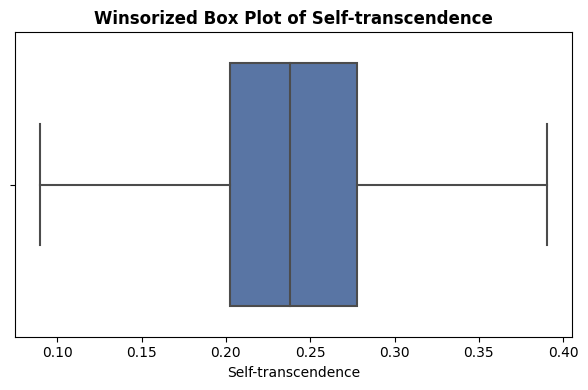

In [8]:
# Apply winsorization and visualize results
for col in numerical_cols:
    print(f"Processing column: {col}")
    
    # Initialize the winsorizer
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[col])
    
    # Fit and transform the data
    data[[col]] = winsorizer.fit_transform(data[[col]])
    
    # Show capping thresholds
    print("Left cap:", winsorizer.left_tail_caps_)
    print("Right cap:", winsorizer.right_tail_caps_)
    
    # Plot with standard color
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col], color='#4C72B0')  # Standard Seaborn blue
    plt.title(f"Winsorized Box Plot of {col}", fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()

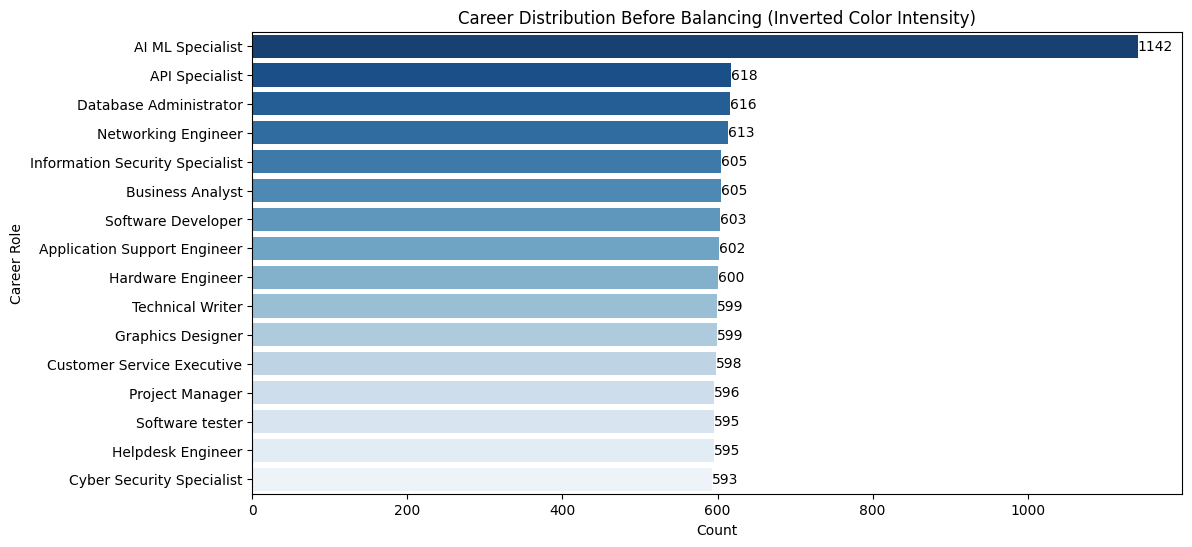

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.countplot(
    y='Role', 
    data=data, 
    order=data['Role'].value_counts().index, 
    palette="Blues_r"  # Same reversed color palette
)

# Annotate the bars with count values
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Career Distribution Before Balancing (Inverted Color Intensity)")
plt.xlabel("Count")
plt.ylabel("Career Role")
plt.show()

In [10]:
from sklearn.utils import resample

# Find the class counts
class_counts = data['Role'].value_counts()

# Identify the majority class
majority_class = class_counts.idxmax()
majority_count = class_counts.max()

# Identify the next highest class count (to avoid under-representing)
second_max_count = class_counts[1]

# Split majority class and the rest
major_class = data[data['Role'] == majority_class]
other_classes = data[data['Role'] != majority_class]

# Downsample majority class to match second-highest count
major_class_downsampled = resample(major_class,
                                   replace=False,
                                   n_samples=second_max_count,
                                   random_state=42)

# Combine and shuffle
balanced_data = pd.concat([major_class_downsampled, other_classes]).sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Majority class has been selectively downsampled!")
print(balanced_data['Role'].value_counts())

✅ Majority class has been selectively downsampled!
Role
AI ML Specialist                   618
API Specialist                     618
Database Administrator             616
Networking Engineer                613
Information Security Specialist    605
Business Analyst                   605
Software Developer                 603
Application Support Engineer       602
Hardware Engineer                  600
Graphics Designer                  599
Technical Writer                   599
Customer Service Executive         598
Project Manager                    596
Helpdesk Engineer                  595
Software tester                    595
Cyber Security Specialist          593
Name: count, dtype: int64


/tmp/ipykernel_35/1603967927.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  second_max_count = class_counts[1]


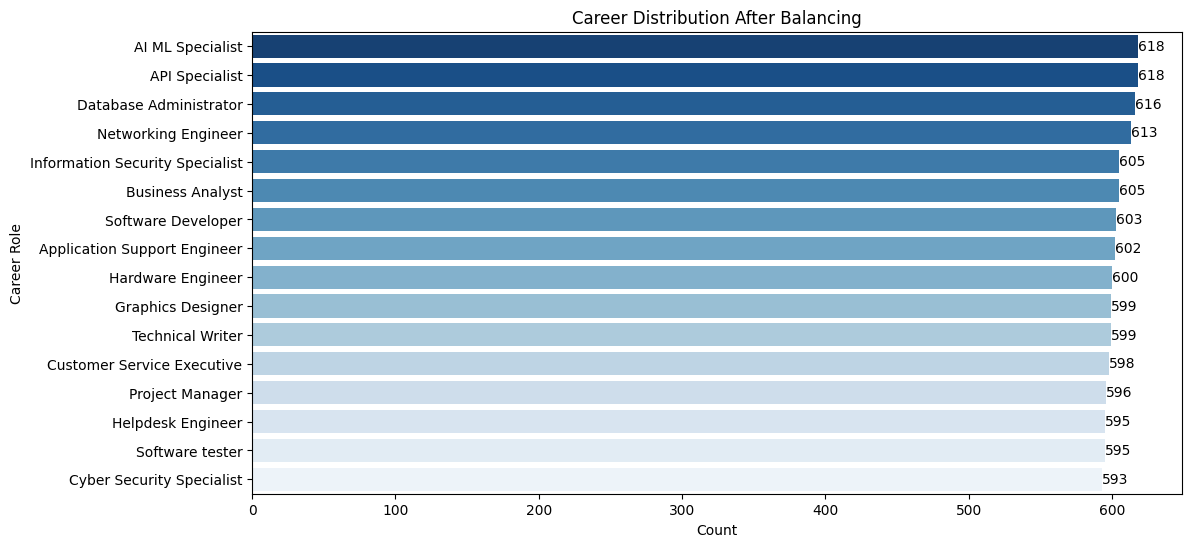

In [13]:
plt.figure(figsize=(12,6))
ax = sns.countplot(
    y='Role', 
    data=balanced_data, 
    order=balanced_data['Role'].value_counts().index, 
    palette="Blues_r"  # reversed palette
)

# Annotate each bar with its count
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Career Distribution After Balancing")
plt.xlabel("Count")
plt.ylabel("Career Role")
plt.show()

In [14]:
# Define the feature columns (exclude the target column)
X = balanced_data.drop(columns=['Role'])

# Define the target column
y = balanced_data['Role']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, "career_predictor_model.pkl")

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Test Accuracy: 0.9047125841532885
Classification Report:
                                  precision    recall  f1-score   support

               AI ML Specialist       0.96      0.96      0.96       124
                 API Specialist       0.87      0.94      0.90       124
   Application Support Engineer       0.84      0.93      0.88       120
               Business Analyst       0.85      0.92      0.88       121
     Customer Service Executive       0.93      0.90      0.92       120
      Cyber Security Specialist       0.92      0.92      0.92       118
         Database Administrator       0.90      0.88      0.89       123
              Graphics Designer       0.89      0.86      0.87       120
              Hardware Engineer       0.96      0.90      0.93       120
              Helpdesk Engineer       0.91      0.92      0.92       119
Information Security Specialist       0.93      0.88      0.91       121
            Networking Engineer       0.92

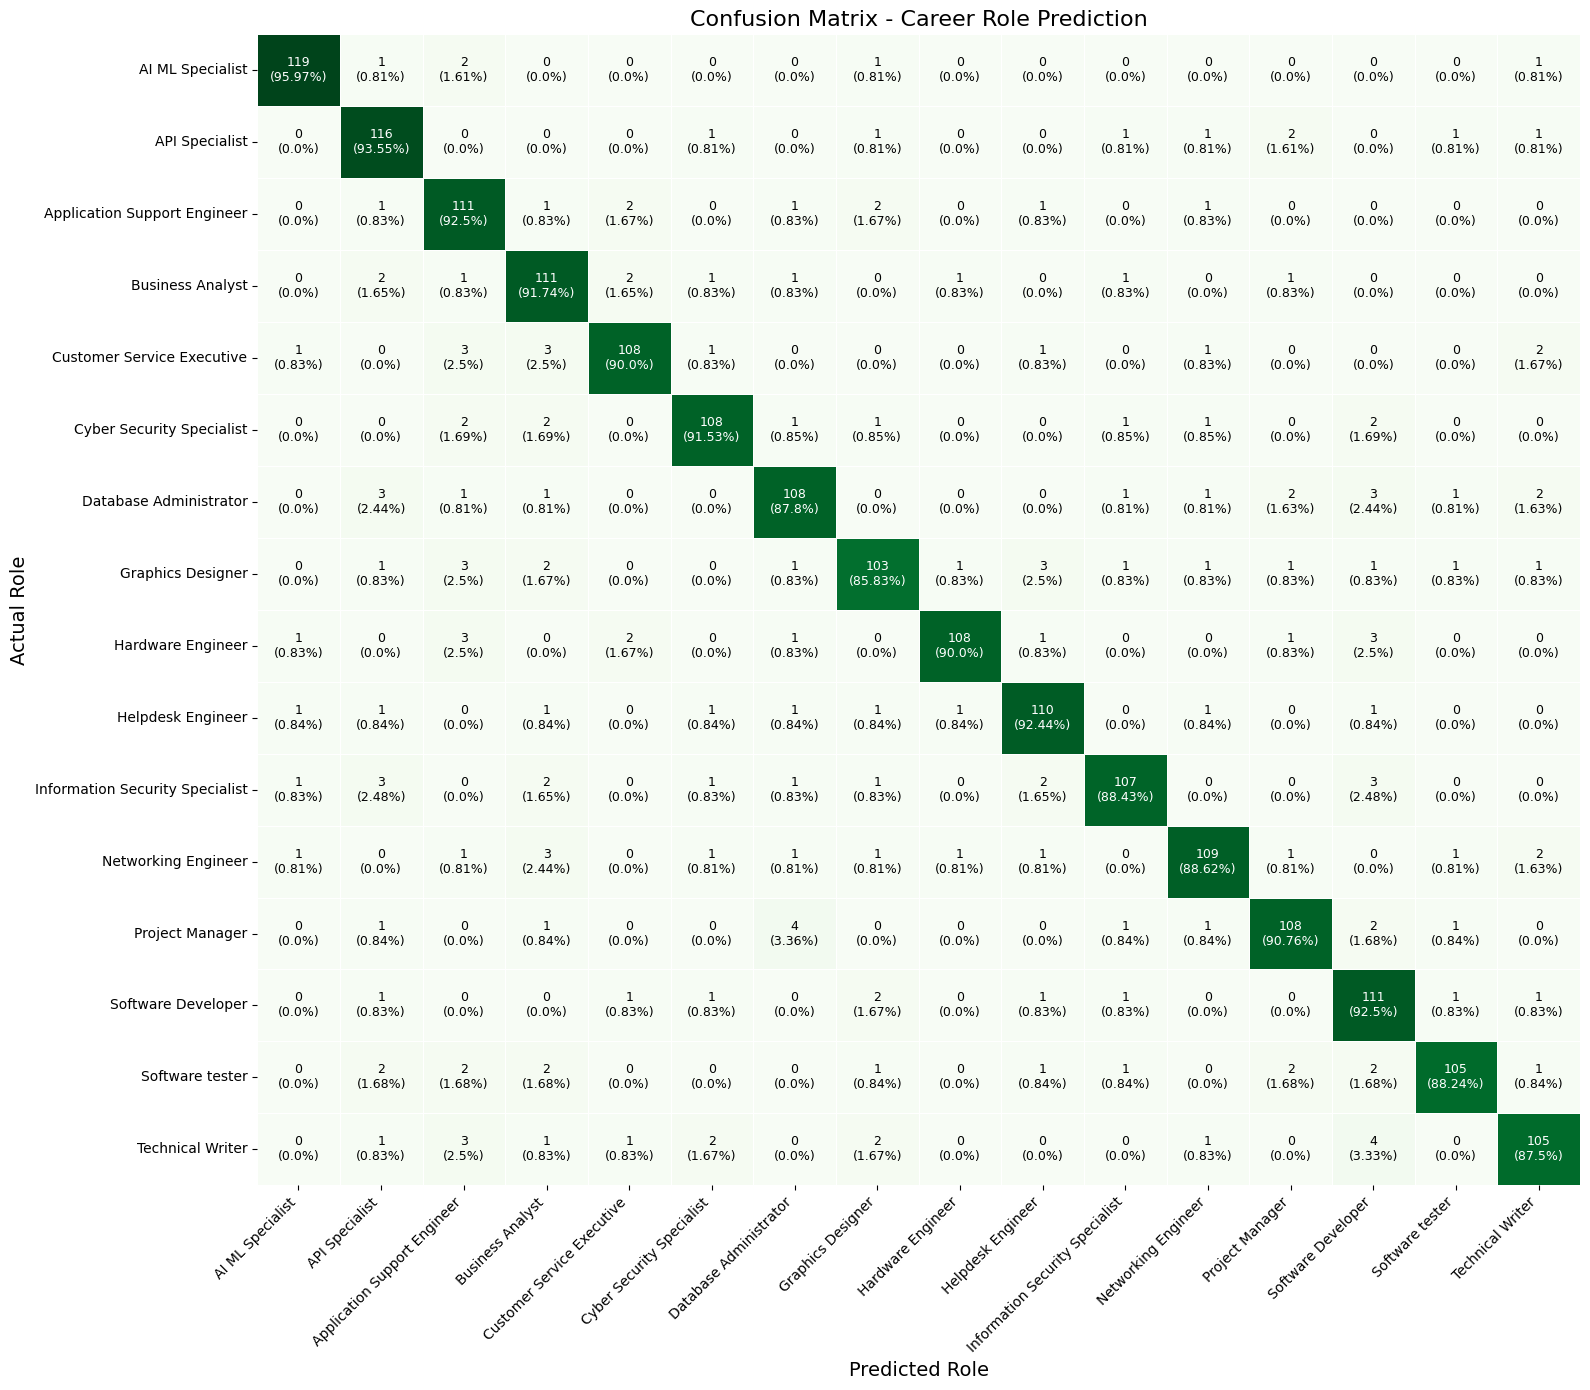

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have role names in the same order as encoded labels
role_names = data['Role'].astype('category').cat.categories.tolist()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = np.round((conf_matrix / row_sums) * 100, 2)

# Make a larger figure for readability
plt.figure(figsize=(16, 14))  # Increased size for better layout

# Heatmap with 'Greens' color
ax = sns.heatmap(conf_matrix,
                 annot=False,
                 fmt='d',
                 cmap="Greens",
                 linewidths=0.5,
                 linecolor='white',
                 xticklabels=role_names,
                 yticklabels=role_names,
                 cbar=False)

# Add text annotations (count + %)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        count = conf_matrix[i, j]
        percent = conf_matrix_percent[i, j]
        font_color = "black" if percent < 60 else "white"
        ax.text(j + 0.5, i + 0.5, f"{count}\n({percent}%)",
                ha="center", va="center", color=font_color, fontsize=9)

# Axis labeling and layout
plt.xlabel("Predicted Role", fontsize=14)
plt.ylabel("Actual Role", fontsize=14)
plt.title("Confusion Matrix - Career Role Prediction", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

------------